In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_pickle("input\LSWMD.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [3]:
df.head

<bound method NDFrame.head of                                                  waferMap  dieSize   lotName  \
0       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0      lot1   
1       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0      lot1   
2       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0      lot1   
3       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0      lot1   
4       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   1683.0      lot1   
...                                                   ...      ...       ...   
811452  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...    600.0  lot47542   
811453  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...    600.0  lot47542   
811454  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...    600.0  lot47542   
811455  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...    600.0  lot47543   
811456  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...    600.0  lot47543   

        w

In [4]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


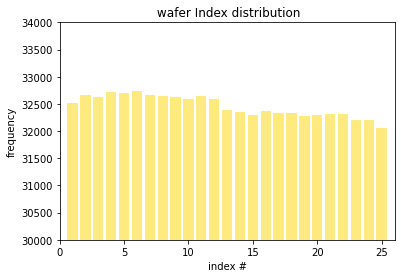

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


uni_Index=np.unique(df.waferIndex, return_counts=True)
plt.bar(uni_Index[0],uni_Index[1], color='gold', align='center', alpha=0.5)
plt.title(" wafer Index distribution")
plt.xlabel("index #")
plt.ylabel("frequency")
plt.xlim(0,26)
plt.ylim(30000,34000)
plt.show()

In [6]:
df = df.drop(['waferIndex'], axis = 1)

In [7]:
def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1
df['waferMapDim']=df.waferMap.apply(find_dim)
df.sample(5)

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim
264473,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2466.0,lot16376,[],[],"(56, 57)"
300164,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4423.0,lot18365,[],[],"(74, 76)"
370486,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2887.0,lot22145,[],[],"(61, 60)"
442839,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...",733.0,lot27056,[],[],"(31, 31)"
412997,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1766.0,lot24576,[],[],"(45, 51)"


In [8]:
max(df.waferMapDim), min(df.waferMapDim)

((300, 202), (6, 21))

In [9]:
uni_waferDim=np.unique(df.waferMapDim, return_counts=True)
uni_waferDim[0].shape[0]

632

In [10]:
df['failureNum']=df.failureType
df['trainTestNum']=df.trianTestLabel
mapping_type={'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8}
mapping_traintest={'Training':0,'Test':1}
df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

D:\Anaconda3\envs\tf22\lib\site-packages\pandas\core\array_algos\replace.py:85: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


In [11]:
dfn =df.drop(df[df.trainTestNum==0].index)
dfn =dfn.drop(dfn[dfn.trainTestNum==1].index)
dfn

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum
35,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,[],[],"(53, 58)",[],[]
45,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,[],[],"(53, 58)",[],[]
69,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot3,[],[],"(53, 58)",[],[]
120,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,[],[],"(53, 58)",[],[]
158,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2,...",533.0,lot7,[],[],"(26, 26)",[],[]
...,...,...,...,...,...,...,...,...
811316,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1,...",600.0,lot47537,[],[],"(26, 30)",[],[]
811322,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47537,[],[],"(26, 30)",[],[]
811354,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47538,[],[],"(26, 30)",[],[]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,[],[],"(26, 30)",[],[]


In [12]:

'''

dfnew = df.drop(df[df.waferMapDim!=(26,26)].index)

for i in range(27,80):
    dfct = df.drop(df[df.waferMapDim!=(i,i)].index)
    dfct1 =df.drop(df[df.waferMapDim!=(i+1,i)].index)
    dfct2 =df.drop(df[df.waferMapDim!=(i-1,i)].index)
    dfct3 =df.drop(df[df.waferMapDim!=(i+2,i)].index)
    dfct4 =df.drop(df[df.waferMapDim!=(i-2,i)].index)
    dfct5 =df.drop(df[df.waferMapDim!=(i+3,i)].index)
    dfct6 =df.drop(df[df.waferMapDim!=(i-3,i)].index)
    dfnew = pd.concat([dfnew,dfct1,dfct2])
'''
''' 
dfnew=dfnew.append
df34 = df.drop(df[df.waferMapDim!=(34,34)].index)
df33 = df.drop(df[df.waferMapDim!=(33,33)].index)
df32 = df.drop(df[df.waferMapDim!=(32,32)].index)
df31 = df.drop(df[df.waferMapDim!=(31,31)].index)
df30 = df.drop(df[df.waferMapDim!=(30,30)].index)
df29 = df.drop(df[df.waferMapDim!=(29,29)].index)
df28 = df.drop(df[df.waferMapDim!=(28,28)].index)
df27 = df.drop(df[df.waferMapDim!=(27,27)].index)
df26 = df.drop(df[df.waferMapDim!=(26,26)].index)
dfnew =pd.concat([df34,df33,df30,df31,df28,df29,df26,df32,df27])
'''
dfnew =df


In [13]:
dfn =dfnew.drop(dfnew[dfnew.trainTestNum==0].index)
dfn =dfn.drop(dfn[dfn.trainTestNum==1].index)
dfn

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum
35,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,[],[],"(53, 58)",[],[]
45,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot2,[],[],"(53, 58)",[],[]
69,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot3,[],[],"(53, 58)",[],[]
120,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460.0,lot5,[],[],"(53, 58)",[],[]
158,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2,...",533.0,lot7,[],[],"(26, 26)",[],[]
...,...,...,...,...,...,...,...,...
811316,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1,...",600.0,lot47537,[],[],"(26, 30)",[],[]
811322,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",600.0,lot47537,[],[],"(26, 30)",[],[]
811354,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47538,[],[],"(26, 30)",[],[]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,[],[],"(26, 30)",[],[]


In [14]:
print(len(dfnew[dfnew.failureNum==0].index))
print(len(dfnew[dfnew.failureNum==1].index))
print(len(dfnew[dfnew.failureNum==2].index))
print(len(dfnew[dfnew.failureNum==3].index))
print(len(dfnew[dfnew.failureNum==4].index))
print(len(dfnew[dfnew.failureNum==5].index))
print(len(dfnew[dfnew.failureNum==6].index))
print(len(dfnew[dfnew.failureNum==7].index))
print(len(dfnew[dfnew.failureNum==8].index))
dfnew

4294
555
5189
9680
3593
866
1193
149
147431


,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],"(45, 48)",8,0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],"(45, 48)",8,0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],"(45, 48)",8,0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],"(45, 48)",8,0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],"(45, 48)",8,0
...,...,...,...,...,...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,[[Test]],[[Edge-Ring]],"(26, 30)",3,1
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,[[Test]],[[Edge-Loc]],"(26, 30)",2,1
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,[[Test]],[[Edge-Ring]],"(26, 30)",3,1
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,[],[],"(26, 30)",[],[]


In [15]:
tol_wafers = dfnew.shape[0]
tol_wafers

811457

In [20]:
dfnew.reset_index(drop=True, inplace=True)
TOSEE= dfnew.waferMap

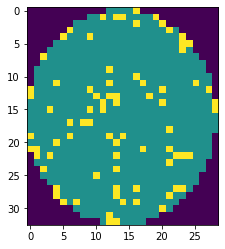

In [72]:
plt.imshow(TOSEE[18660])
plt.show()

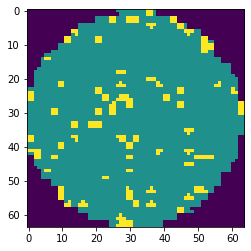

In [79]:
import cv2

aaa = cv2.resize((TOSEE[18660]), (64,64), interpolation=cv2.INTER_AREA)

plt.imshow(aaa)
plt.show()

aaa=aaa.reshape(-1,64,64,1)

In [80]:
def create_three_chanel(wafer):
    new_x = np.zeros((len(wafer), 64, 64, 3))

    for w in range(len(wafer)):
        for i in range(64):
            for j in range(64):
                new_x[w, i, j, int(wafer[w, i, j])] = 1
    return new_x

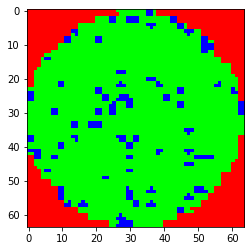

In [82]:
aa= create_three_chanel(aaa)
plt.imshow(aa[0])
plt.show()


In [83]:
'''
import cv2

No = 0
NCenter = 0
NDonut = 0
NEdge_Loc = 0
NEdge_Ring = 0
NLoc = 0
NRandom = 0
NScratch = 0
NNear_full = 0 
NNone = 0

for id in range(811457):
    img = df.waferMap[id]
    img = cv2.resize(img, (64,64), interpolation=cv2.INTER_AREA)#INTER_LINEAR)  #cv2 调整分辨率  大家可以使用32*32  48*48  64*64  
    
    if len(df.failureType[id]) == 0:
        
        continue
        
    else:       
        if df.failureNum[id] == 0:
            S_NCenter = str(NCenter)
            np.save('Raw_data/Center/'+S_NCenter+'.npy', img)
            NCenter += 1            

        if df.failureNum[id] == 1:
            S_NDonut = str(NDonut)
            np.save('Raw_data/Donut/'+S_NDonut+'.npy', img)
            NDonut += 1              

        if df.failureNum[id] == 2:
            S_NEdge_Loc = str(NEdge_Loc)
            np.save('Raw_data/Edge_Loc/'+S_NEdge_Loc+'.npy', img)
            NEdge_Loc += 1              
            
        if df.failureNum[id] == 3:
            S_NEdge_Ring = str(NEdge_Ring)
            np.save('Raw_data/Edge_Ring/'+S_NEdge_Ring+'.npy', img) 
            NEdge_Ring += 1              
            
        if df.failureNum[id] == 4:
            S_NLoc = str(NLoc)
            np.save('Raw_data/Loc/'+S_NLoc+'.npy', img)
            NLoc += 1              
            
        if df.failureNum[id] == 5:
            S_NRandom = str(NRandom)
            np.save('Raw_data/Random/'+S_NRandom+'.npy', img)
            NRandom += 1              
            
        if df.failureNum[id] == 6:
            S_NScratch = str(NScratch)
            np.save('Raw_data/Scratch/'+S_NScratch+'.npy', img)
            NScratch += 1              

        if df.failureNum[id] == 7:
            S_NNear_full = str(NNear_full)
            np.save('Raw_data/Near_full/'+S_NNear_full+'.npy', img)
            NNear_full += 1  
            
        if df.failureNum[id] == 8:
            S_NNone = str(NNone)
            np.save('Raw_data/None/'+S_NNone+'.npy', img)
            NNone += 1                 
            
print(No)
print(NCenter)
print(NDonut)
print(NEdge_Loc)
print(NEdge_Ring)
print(NLoc)
print(NRandom)
print(NScratch)
print(NNear_full)
print(NNone)
'''

'''
0 = center
1 = Donut
2 = Edge_Loc
3 = Edge_Ring
4 = Loc
5 = Random
6 = Scratch
7 = Near_full
8 = None

'''

'\n0 = center\n1 = Donut\n2 = Edge_Loc\n3 = Edge_Ring\n4 = Loc\n5 = Random\n6 = Scratch\n7 = Near_full\n8 = None\n\n'

In [84]:
#'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8
'''
638507
4294
555
5189
9680
3593
866
1193
149
147431

'''

'\n638507\n4294\n555\n5189\n9680\n3593\n866\n1193\n149\n147431\n\n'

In [85]:
'''

fig, ax = plt.subplots(nrows = 30, ncols = 30, figsize=(20, 20))
ax = ax.ravel(order='C')
for i in range(900):
    S_i = str(i)
    img = np.load('Raw_data_32/Scratch/'+S_i+'.npy')
    ax[i].imshow(img)
    #ax[i].set_title(df_withpattern.failureType[i][0][0], fontsize=10)
    #ax[i].set_xlabel(df_withpattern.index[i], fontsize=8)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show()

SyntaxError: EOF while scanning triple-quoted string literal (3687538945.py, line 14)